In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
dflist =[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename))  # Read the CSV file into a DataFrame
        dflist.append(df)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
#HEART  Electrocardiogram(ECG) 
df_ptbdb_abnormal = dflist[0]
df_ptbdb_normal = dflist[1]
df_mitbih_test = dflist[2]
df_mitbih_train = dflist[3]

In [94]:
df_mitbih_test.columns

Index(['1.000000000000000000e+00', '7.582644820213317871e-01',
       '1.115702465176582336e-01', '0.000000000000000000e+00',
       '8.057851344347000122e-02', '7.851240038871765137e-02',
       '6.611569970846176147e-02', '4.958677664399147034e-02',
       '4.752065986394882202e-02', '3.512396663427352905e-02',
       ...
       '0.000000000000000000e+00.56', '0.000000000000000000e+00.57',
       '0.000000000000000000e+00.58', '0.000000000000000000e+00.59',
       '0.000000000000000000e+00.60', '0.000000000000000000e+00.61',
       '0.000000000000000000e+00.62', '0.000000000000000000e+00.63',
       '0.000000000000000000e+00.64', '0.000000000000000000e+00.65'],
      dtype='object', length=188)

In [95]:
df_mitbih_train.columns

Index(['9.779411554336547852e-01', '9.264705777168273926e-01',
       '6.813725233078002930e-01', '2.450980395078659058e-01',
       '1.544117629528045654e-01', '1.911764740943908691e-01',
       '1.519607901573181152e-01', '8.578431606292724609e-02',
       '5.882352963089942932e-02', '4.901960864663124084e-02',
       ...
       '0.000000000000000000e+00.79', '0.000000000000000000e+00.80',
       '0.000000000000000000e+00.81', '0.000000000000000000e+00.82',
       '0.000000000000000000e+00.83', '0.000000000000000000e+00.84',
       '0.000000000000000000e+00.85', '0.000000000000000000e+00.86',
       '0.000000000000000000e+00.87', '0.000000000000000000e+00.88'],
      dtype='object', length=188)

In [97]:
# Find differences in column names
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

print("Columns in Train but not in Test:", len(train_cols - test_cols))
print("Columns in Test but not in Train:", len(test_cols - train_cols))
len()

Columns in Train but not in Test: 120
Columns in Test but not in Train: 121


# Data Exploratory


In [4]:
df_mitbih_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [5]:
df_mitbih_train.iloc[10000:10030]

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
10000,0.990050,0.937811,0.507463,0.189055,0.101990,0.106965,0.064677,0.064677,0.039801,0.042289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001,1.000000,0.915110,0.494058,0.140917,0.181664,0.224109,0.210526,0.210526,0.210526,0.190153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10002,0.995575,0.817109,0.393805,0.082596,0.000000,0.091445,0.135693,0.106195,0.100295,0.100295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10003,1.000000,0.670139,0.031250,0.069444,0.083333,0.097222,0.083333,0.083333,0.076389,0.069444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10004,0.650558,0.092937,0.037175,0.249071,0.319703,0.382900,0.394052,0.371747,0.371747,0.394052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005,1.000000,0.698473,0.000000,0.061069,0.062977,0.089695,0.137405,0.129771,0.131679,0.133588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10006,1.000000,0.957507,0.722380,0.470255,0.277620,0.334278,0.396601,0.470255,0.481586,0.464589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10007,1.000000,0.902959,0.480473,0.053254,0.240237,0.273373,0.184615,0.182249,0.194083,0.190533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008,0.969256,0.915858,0.380259,0.000000,0.144013,0.258900,0.283172,0.304207,0.299353,0.299353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10009,0.550802,0.855615,1.000000,0.203209,0.219251,0.470588,0.491979,0.556150,0.577540,0.566845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_mitbih_train.columns

Index(['9.779411554336547852e-01', '9.264705777168273926e-01',
       '6.813725233078002930e-01', '2.450980395078659058e-01',
       '1.544117629528045654e-01', '1.911764740943908691e-01',
       '1.519607901573181152e-01', '8.578431606292724609e-02',
       '5.882352963089942932e-02', '4.901960864663124084e-02',
       ...
       '0.000000000000000000e+00.79', '0.000000000000000000e+00.80',
       '0.000000000000000000e+00.81', '0.000000000000000000e+00.82',
       '0.000000000000000000e+00.83', '0.000000000000000000e+00.84',
       '0.000000000000000000e+00.85', '0.000000000000000000e+00.86',
       '0.000000000000000000e+00.87', '0.000000000000000000e+00.88'],
      dtype='object', length=188)

In [7]:
for column in df_mitbih_train.columns:
    if df_mitbih_train[column].nunique() == 5:
        print(column)

0.000000000000000000e+00.88


In [8]:
df_mitbih_train['0.000000000000000000e+00.88'].value_counts()

0.000000000000000000e+00.88
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

<Axes: xlabel='0.000000000000000000e+00.88'>

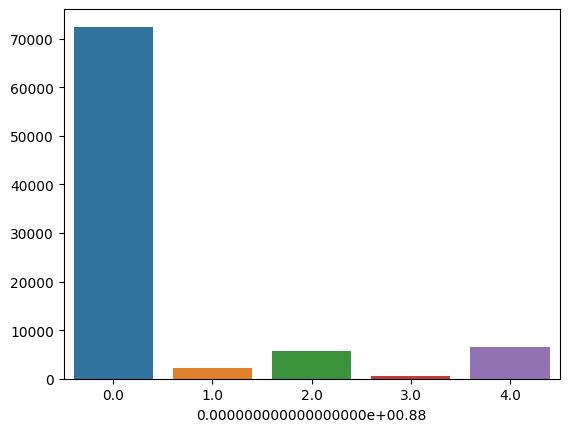

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = df_mitbih_train['0.000000000000000000e+00.88'].value_counts().index,y = df_mitbih_train['0.000000000000000000e+00.88'].value_counts().values)

In [43]:
# Class Imbalance
import random
# /20 class 0
drop_list =[]
for index in df_mitbih_train.index:
    if df_mitbih_train["0.000000000000000000e+00.88"][index] == 0:
        if random.random() < 0.1:
            continue
        else :
            drop_list.append(index)
dropped_df_mitbih_train = df_mitbih_train.drop(drop_list)

<Axes: xlabel='0.000000000000000000e+00.88'>

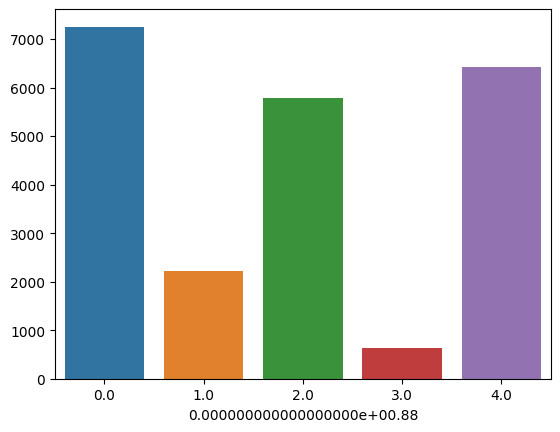

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = dropped_df_mitbih_train['0.000000000000000000e+00.88'].value_counts().index,y = dropped_df_mitbih_train['0.000000000000000000e+00.88'].value_counts().values)

In [12]:
dropped_df_mitbih_train.describe()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
count,22331.000000,22331.000000,22331.000000,22331.000000,22331.000000,22331.000000,22331.000000,22331.000000,22331.000000,22331.000000,...,22331.000000,22331.000000,22331.000000,22331.000000,22331.000000,22331.000000,22331.00000,22331.000000,22331.00000,22331.000000
mean,0.816965,0.700609,0.484497,0.341416,0.309407,0.297691,0.281050,0.263986,0.244381,0.222090,...,0.011616,0.011037,0.010431,0.009632,0.009102,0.008773,0.00841,0.007867,0.00757,1.855985
std,0.299236,0.274424,0.252060,0.260282,0.237765,0.221394,0.216097,0.202135,0.182329,0.171988,...,0.067329,0.066446,0.064763,0.061778,0.060266,0.059367,0.05768,0.055092,0.05370,1.599329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
25%,0.779950,0.549714,0.292286,0.117399,0.117083,0.117647,0.096622,0.089655,0.090742,0.090187,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
50%,0.956204,0.795309,0.495356,0.304414,0.238768,0.233618,0.232394,0.228723,0.218818,0.180659,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,2.000000
75%,1.000000,0.911232,0.666667,0.523980,0.492063,0.469480,0.438970,0.406571,0.353147,0.301833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985560,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,4.000000


# Handling corr and preprocessing

In [89]:
# Correlation Checking
train_df = dropped_df_mitbih_train.iloc[:, :-1]
test_df = df_mitbih_test
'''
high_corr = train_df.corr()[(train_df.corr() > 0.7) | (train_df.corr() < -0.7)]
high_corr = high_corr.dropna(how="all").dropna(axis=1, how="all")
'''

'\nhigh_corr = train_df.corr()[(train_df.corr() > 0.7) | (train_df.corr() < -0.7)]\nhigh_corr = high_corr.dropna(how="all").dropna(axis=1, how="all")\n'

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_df)
scaled_test = scaler.fit_transform(test_df)

In [86]:
# Too many features, need a better way
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_features = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

In [87]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,-10.640108,0.948541,-1.857442,-0.948305,-2.858592,0.455168,-0.898101,-1.479396,-0.355388,-0.926492,...,-0.380519,0.386376,-0.310286,-1.061613,-0.314767,1.108891,-1.076171,0.820010,-0.357393,-0.114391
1,13.288546,-2.864453,1.727992,-4.028213,-0.441980,2.557125,-1.349520,3.516332,-0.590500,-1.608915,...,1.082123,-1.468979,0.467445,1.823341,0.410404,0.969492,-0.523081,-0.276016,-0.438821,-0.326903
2,-6.382262,-0.790856,-1.258348,0.905249,0.213047,-3.161920,0.993792,3.786916,-1.753077,0.468426,...,-1.238469,1.102664,1.302334,-0.081973,0.798137,-0.414895,-0.025733,0.365392,-0.215512,0.083402
3,-9.300451,0.541016,0.691134,1.334634,-2.642118,-2.132396,-1.269719,-0.313661,0.805383,-1.295530,...,1.263511,-0.658174,-0.355886,-0.059094,0.591337,-1.208582,1.220078,-0.346131,-0.300541,-0.018529
4,-6.253664,-0.646289,-0.308562,1.170932,-1.933071,-3.058347,-1.759094,0.903103,0.256561,-1.008258,...,-1.003848,0.123086,-0.441572,0.020962,-0.843697,0.616607,-0.109663,-0.829586,0.712858,0.119394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,-4.141468,-1.123549,1.566116,1.919546,1.405878,-0.248684,-0.764641,-1.695827,1.495668,1.416807,...,0.494969,-0.198719,0.546794,0.498981,0.472883,-0.219905,-0.234256,0.028450,-0.109089,0.011559
22463,9.229626,-4.965808,0.744953,1.449213,-3.571250,0.824606,2.664970,-1.440105,0.691834,2.140986,...,0.043150,0.260725,0.786718,0.083916,0.866420,-0.075668,-0.359929,-0.652251,0.673714,-0.154539
22464,7.929631,-4.690718,2.875615,2.951228,1.587268,0.110813,2.983500,1.095712,-0.684549,-2.632114,...,0.782865,0.219113,-0.022099,-1.003268,-0.323217,0.865879,-0.072457,0.353169,-0.703560,0.288193
22465,-8.801954,1.083943,3.127865,1.142039,-0.001545,1.426102,-0.679137,-1.573504,-0.307376,0.168451,...,0.003846,0.562478,0.225990,-0.888667,0.198481,1.015062,0.681804,-1.699093,-0.362604,-0.280566


In [69]:
real_to_drop['column_'].nunique()

187

In [77]:
train_df.corr()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.78,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87
9.779411554336547852e-01,1.000000,0.850313,0.428424,0.112717,-0.002138,-0.094837,-0.191964,-0.288502,-0.409437,-0.542542,...,-0.049748,-0.048713,-0.045578,-0.044320,-0.046890,-0.047647,-0.047295,-0.045814,-0.043307,-0.040411
9.264705777168273926e-01,0.850313,1.000000,0.604393,0.167516,0.028536,-0.043340,-0.147800,-0.241848,-0.345815,-0.437621,...,-0.011119,-0.012167,-0.011207,-0.011764,-0.017076,-0.020071,-0.021369,-0.019341,-0.017642,-0.015351
6.813725233078002930e-01,0.428424,0.604393,1.000000,0.793748,0.595631,0.488415,0.379547,0.238465,0.065960,-0.103777,...,-0.043242,-0.051053,-0.057839,-0.061317,-0.070305,-0.077519,-0.081544,-0.083466,-0.087355,-0.090035
2.450980395078659058e-01,0.112717,0.167516,0.793748,1.000000,0.905476,0.776208,0.664991,0.524247,0.333110,0.130250,...,-0.047679,-0.056410,-0.066270,-0.071308,-0.081439,-0.090045,-0.095147,-0.099101,-0.103979,-0.107896
1.544117629528045654e-01,-0.002138,0.028536,0.595631,0.905476,1.000000,0.945159,0.854246,0.734223,0.553222,0.336528,...,-0.017545,-0.025886,-0.036596,-0.043205,-0.054381,-0.063374,-0.067895,-0.070417,-0.075598,-0.078712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.000000000000000000e+00.83,-0.047647,-0.020071,-0.077519,-0.090045,-0.063374,-0.044114,-0.043661,-0.031556,-0.013273,-0.011815,...,0.788494,0.815769,0.852402,0.908065,0.962285,1.000000,0.965112,0.926403,0.887502,0.862807
0.000000000000000000e+00.84,-0.047295,-0.021369,-0.081544,-0.095147,-0.067895,-0.047192,-0.046152,-0.032233,-0.012083,-0.010794,...,0.771487,0.794581,0.823846,0.868581,0.917710,0.965112,1.000000,0.968759,0.924773,0.895353
0.000000000000000000e+00.85,-0.045814,-0.019341,-0.083466,-0.099101,-0.070417,-0.048982,-0.047250,-0.031893,-0.009925,-0.008858,...,0.762313,0.782604,0.808550,0.847247,0.886461,0.926403,0.968759,1.000000,0.966569,0.932318
0.000000000000000000e+00.86,-0.043307,-0.017642,-0.087355,-0.103979,-0.075598,-0.054378,-0.051893,-0.034698,-0.010500,-0.010224,...,0.748560,0.767026,0.788707,0.822517,0.856472,0.887502,0.924773,0.966569,1.000000,0.972756


# Using a logistics regression